In [1]:
# importing library
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
import pandas as pd
from matplotlib import pyplot

Num GPUs Available:  1


In [2]:
# importing data set
SKU = pd.read_csv("weekly_sales_per_sku2.csv")

In [3]:
# check data types
SKU.dtypes

Scode    object
Pcode    object
Price     int64
0         int64
1         int64
          ...  
99        int64
100       int64
101       int64
102       int64
103       int64
Length: 107, dtype: object

In [4]:
# unpivot
SKU = pd.melt(SKU, id_vars=['Scode', 'Pcode', 'Price'], var_name='Week', value_name='Amount')

In [5]:
# creating a variable
SKU['GMV']=SKU['Price']*SKU['Amount']

In [6]:
# check data types
SKU.dtypes

Scode     object
Pcode     object
Price      int64
Week      object
Amount     int64
GMV        int64
dtype: object

In [7]:
SKU = SKU.astype({'Week':'int'})

In [8]:
# check data types
SKU.dtypes

Scode     object
Pcode     object
Price      int64
Week       int64
Amount     int64
GMV        int64
dtype: object

In [9]:
# check head
SKU.head()

,Scode,Pcode,Price,Week,Amount,GMV
0,Store1,SKU1,24,0,23,552
1,Store1,SKU2,63,0,23,1449
2,Store1,SKU3,93,0,7,651
3,Store1,SKU4,48,0,50,2400
4,Store1,SKU5,62,0,8,496


In [10]:
inde_var = SKU['Week']
de_var = SKU['Amount']
print(inde_var.shape, de_var.shape)

(624000,) (624000,)


In [11]:
# creating model structure
X = tf.keras.layers.Input(shape=[1]) # 1 is the number of independent variable
Y = tf.keras.layers.Dense(1)(X) # 1 is the number of dependent varialbe
model = tf.keras.models.Model(X, Y) 
model.compile(loss='mse') # choose deep learning method (https://durian9s-coding-tree.tistory.com/2)

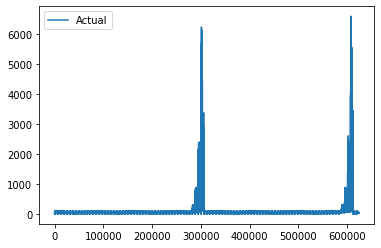

In [12]:
pyplot.plot(SKU['Amount'], label='Actual')
pyplot.legend()
pyplot.show()

In [ ]:
predict = model.fit(inde_var, de_var, epochs=1000)

Epoch 1/1000
19500/19500 [==============================] - 51s 3ms/step - loss: 37495.4375
Epoch 2/1000
19500/19500 [==============================] - 45s 2ms/step - loss: 37358.8398
Epoch 3/1000
19500/19500 [==============================] - 45s 2ms/step - loss: 37325.7656
Epoch 4/1000
19500/19500 [==============================] - 45s 2ms/step - loss: 37300.9609
Epoch 5/1000
19500/19500 [==============================] - 65s 3ms/step - loss: 37283.6250
Epoch 6/1000
19500/19500 [==============================] - 45s 2ms/step - loss: 37270.0781
Epoch 7/1000
19500/19500 [==============================] - 52s 3ms/step - loss: 37261.1953
Epoch 8/1000
19500/19500 [==============================] - 54s 3ms/step - loss: 37254.6719
Epoch 9/1000
19500/19500 [==============================] - 51s 3ms/step - loss: 37248.9375
Epoch 10/1000
19500/19500 [==============================] - 47s 2ms/step - loss: 37245.1758
Epoch 11/1000
14610/19500 [=====================>........] - ETA: 12s - loss: 3

In [ ]:
# predict the sales amount in each week
predict = model.predict(inde_var)

In [ ]:
SKU['predict'] = predict

In [ ]:
print(predict)

In [ ]:
SKU.head()

In [ ]:
pyplot.plot(SKU['Amount'], label='Actual')
pyplot.plot(SKU['predict'], label='Predict')
pyplot.legend()
pyplot.show()